# 差分方程
差分方程建模的关键在于如何得到第n组数据与第n+1组数据之间的关系。

递推关系-酵母菌生长模型

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import diff

In [12]:
time = [i for i in range(0, 19)]
number = [9.6, 18.3, 29, 47.2, 71.1, 119.1, 174.6, 257.3,
          350.7, 441.0, 513.3, 559.7, 594.8, 629.4, 640.8,
          651.1, 655.9, 659.6, 661.8]

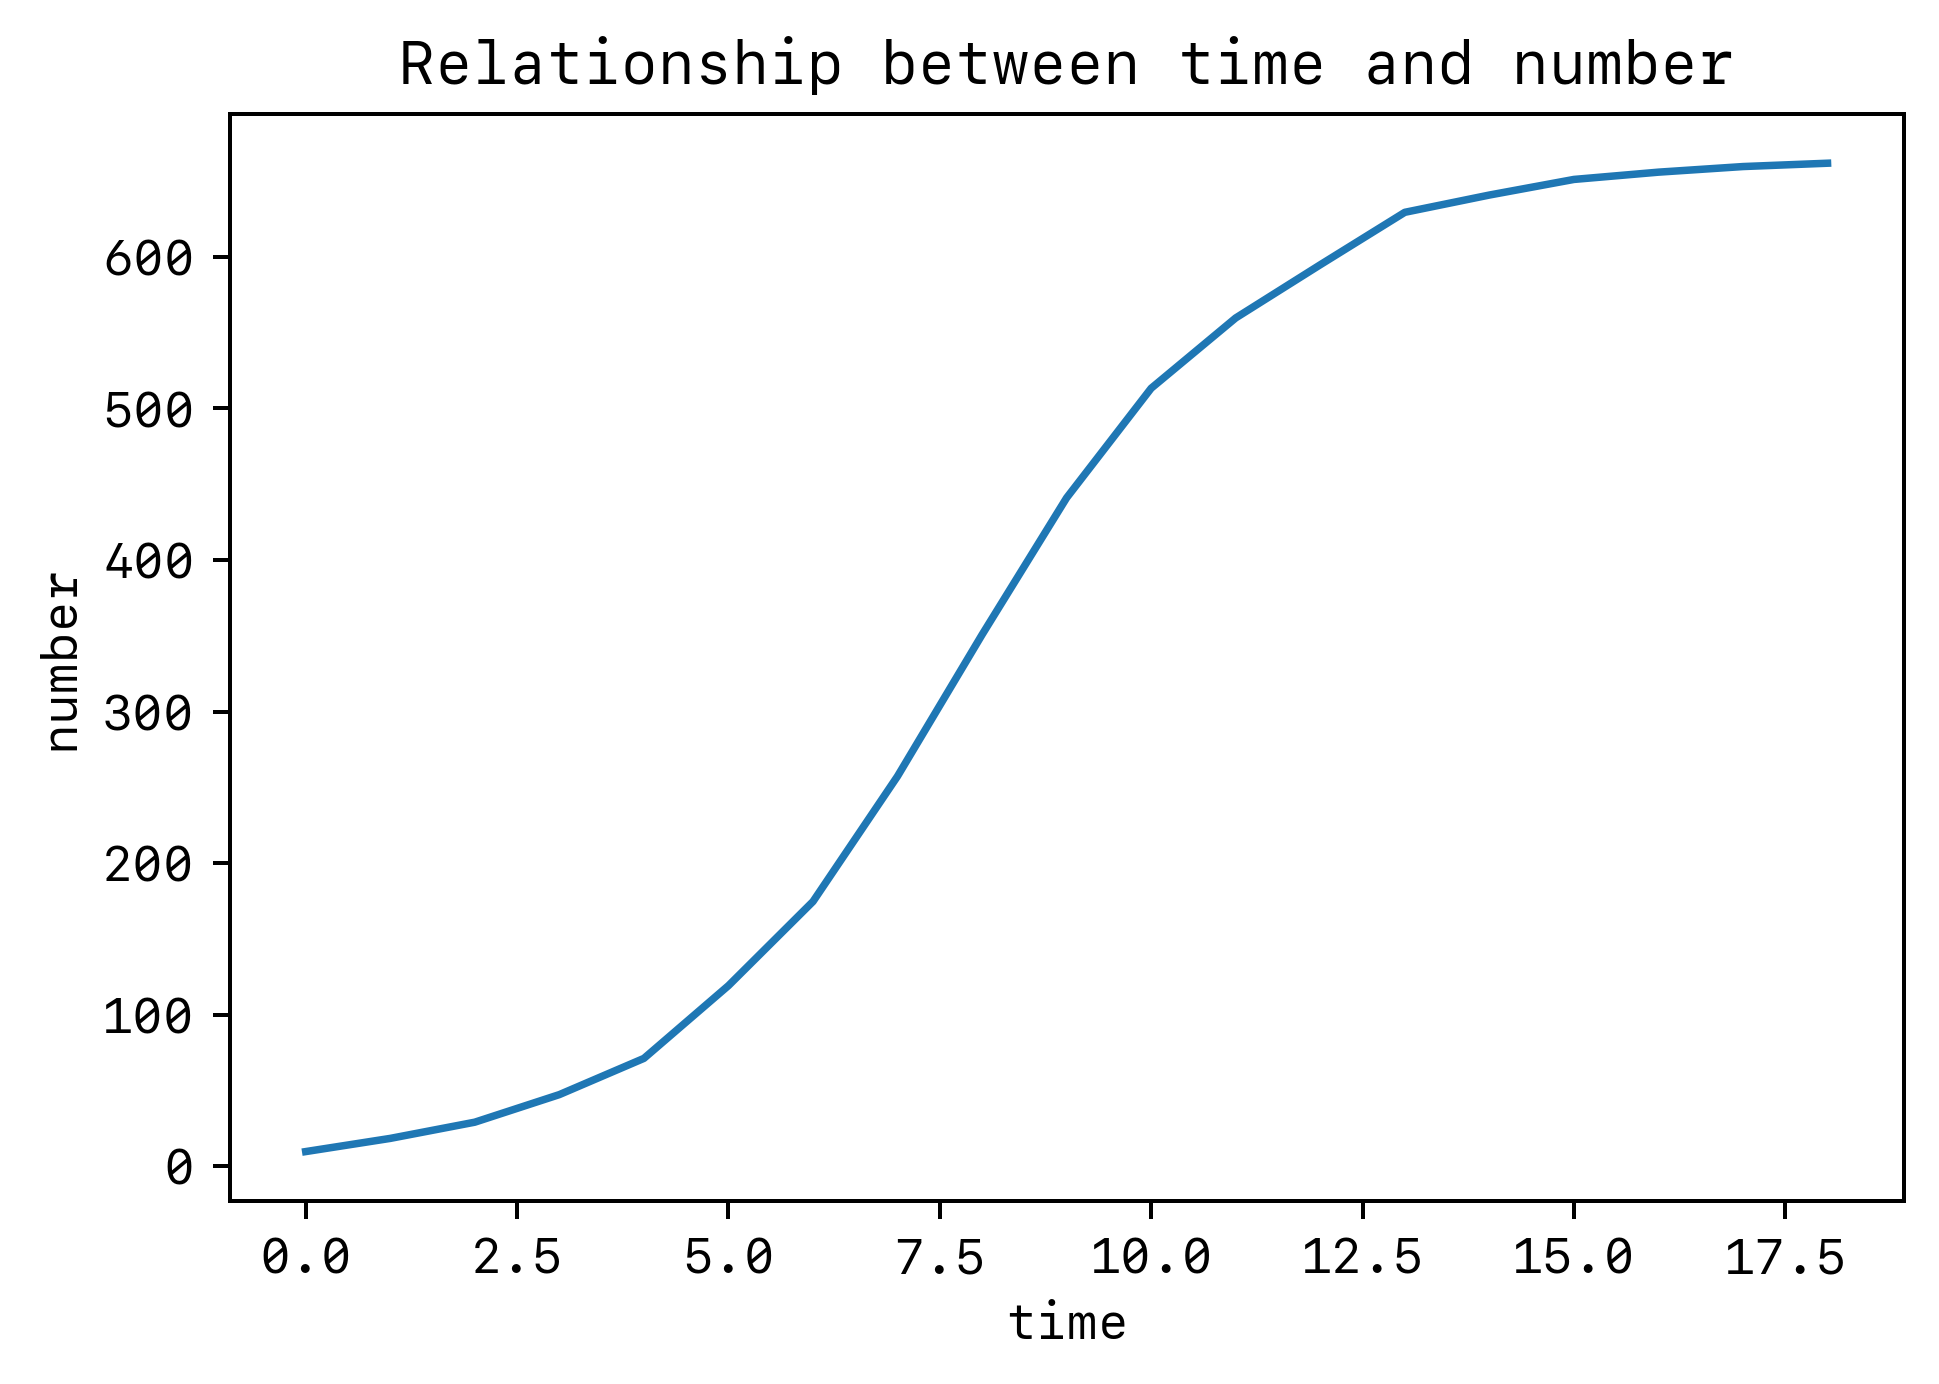

In [13]:
plt.rcParams['font.sans-serif'] = ['SF Mono']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 360  #图片像素
plt.rcParams['figure.dpi'] = 360  #分辨率

plt.title('Relationship between time and number')  #创建标题
plt.xlabel('time')  #X轴标签
plt.ylabel('number')  #Y轴标签
plt.plot(time, number)  #画图
plt.show()  #显示

<img src="../images/iShot2021-08-27 17.25.10.png"/>

In [14]:
pn = [9.6, 18.3, 29, 47.2, 71.1, 119.1, 174.6, 257.3,
      350.7, 441.0, 513.3, 559.7, 594.8, 629.4, 640.8,
      651.1, 655.9, 659.6]

deltap = [8.7, 10.7, 18.2, 23.9, 48, 55.5, 82.7, 93.4,
          90.3, 72.3, 46.4, 35.1, 34.6, 11.4, 10.3, 4.8,
          3.7, 2.2]

pn = np.array(pn)
factor = pn * (665 - pn)
f = np.polyfit(factor, deltap, 1)
print(f)

[ 0.00081448 -0.30791574]


<img src="../images/iShot2021-08-27 17.32.24.png"/>

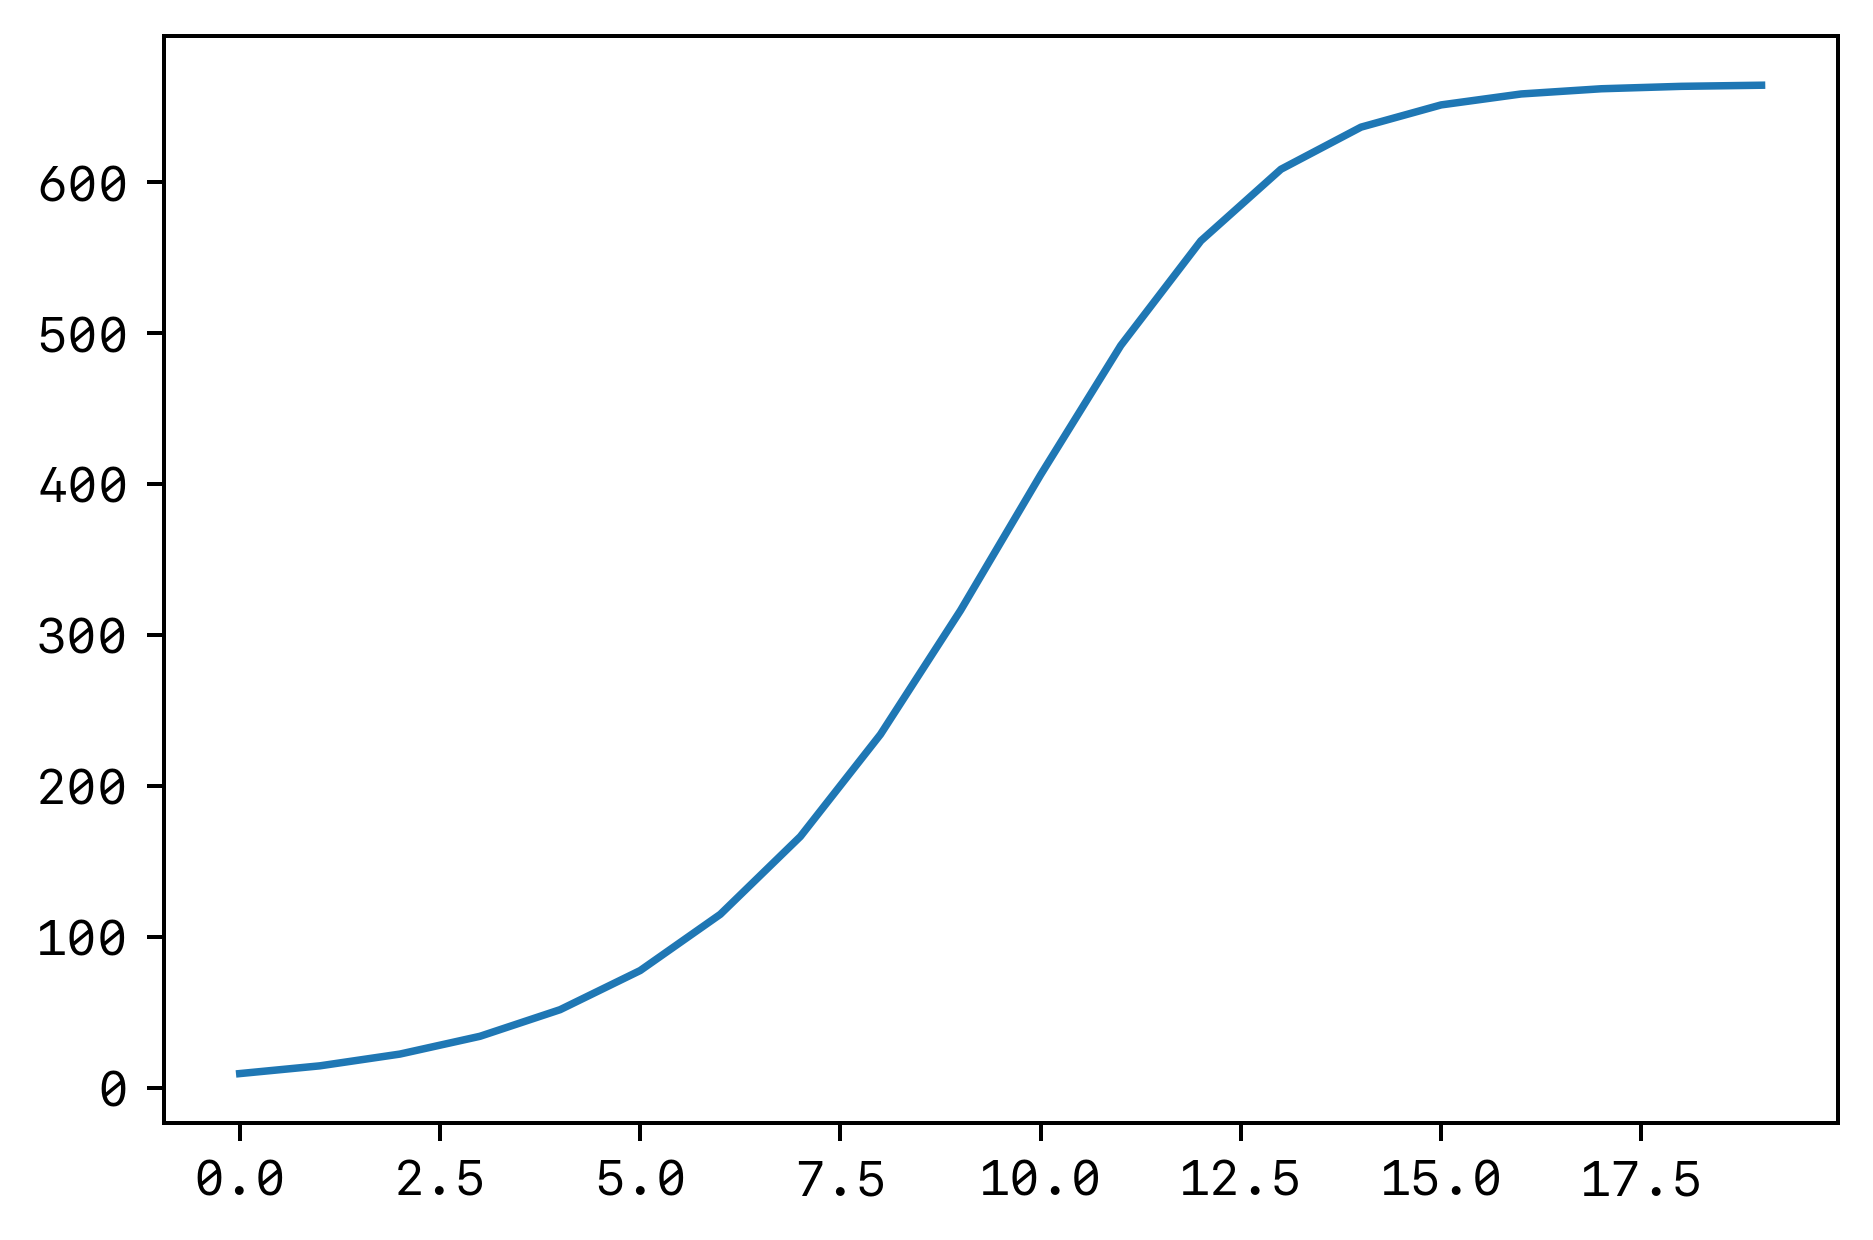

In [15]:
p0 = 9.6
p_list = []
for i in range(20):
    p_list.append(p0)
    p0 = 0.00081448 * (665 - p0) * p0 + p0
plt.plot(p_list)
plt.show()

**(1) 差分**

差分是统计学里一个常用的概念，应该是源自更为基础的学科——数学，里的数列概念。

> 数列(sequence of number)：
是以正整数集（或它的有限子集）为定义域的函数，是一列有序的数

所以我们通常所接触的时间序列，本质就是一个数列，只不过多了一个时间列，显式的告诉你这列数发生变化的时间点位。

> 差分(difference methods):
>
> 1. 统计学中的差分，就是指离散函数的后一项减去前一项的差
> 2. 数学中的差分，是一种微分方程数值方法，通过有限差分来近似导数，从而寻求微分方程的近似解。

**(2) 一阶差分**

一阶差分就是用原数列的后一项减去前一项得到的一组差数列。

**(3) 二阶差分**

二阶差分既是对远数列进行的第二次差分操作，也等于在一阶差分的基础上再做一次差分。

<img src="../images/iShot2021-08-31 18.05.16.png"/>

举了个特殊的例子来说明，会看的比较清晰。


<AxesSubplot:>

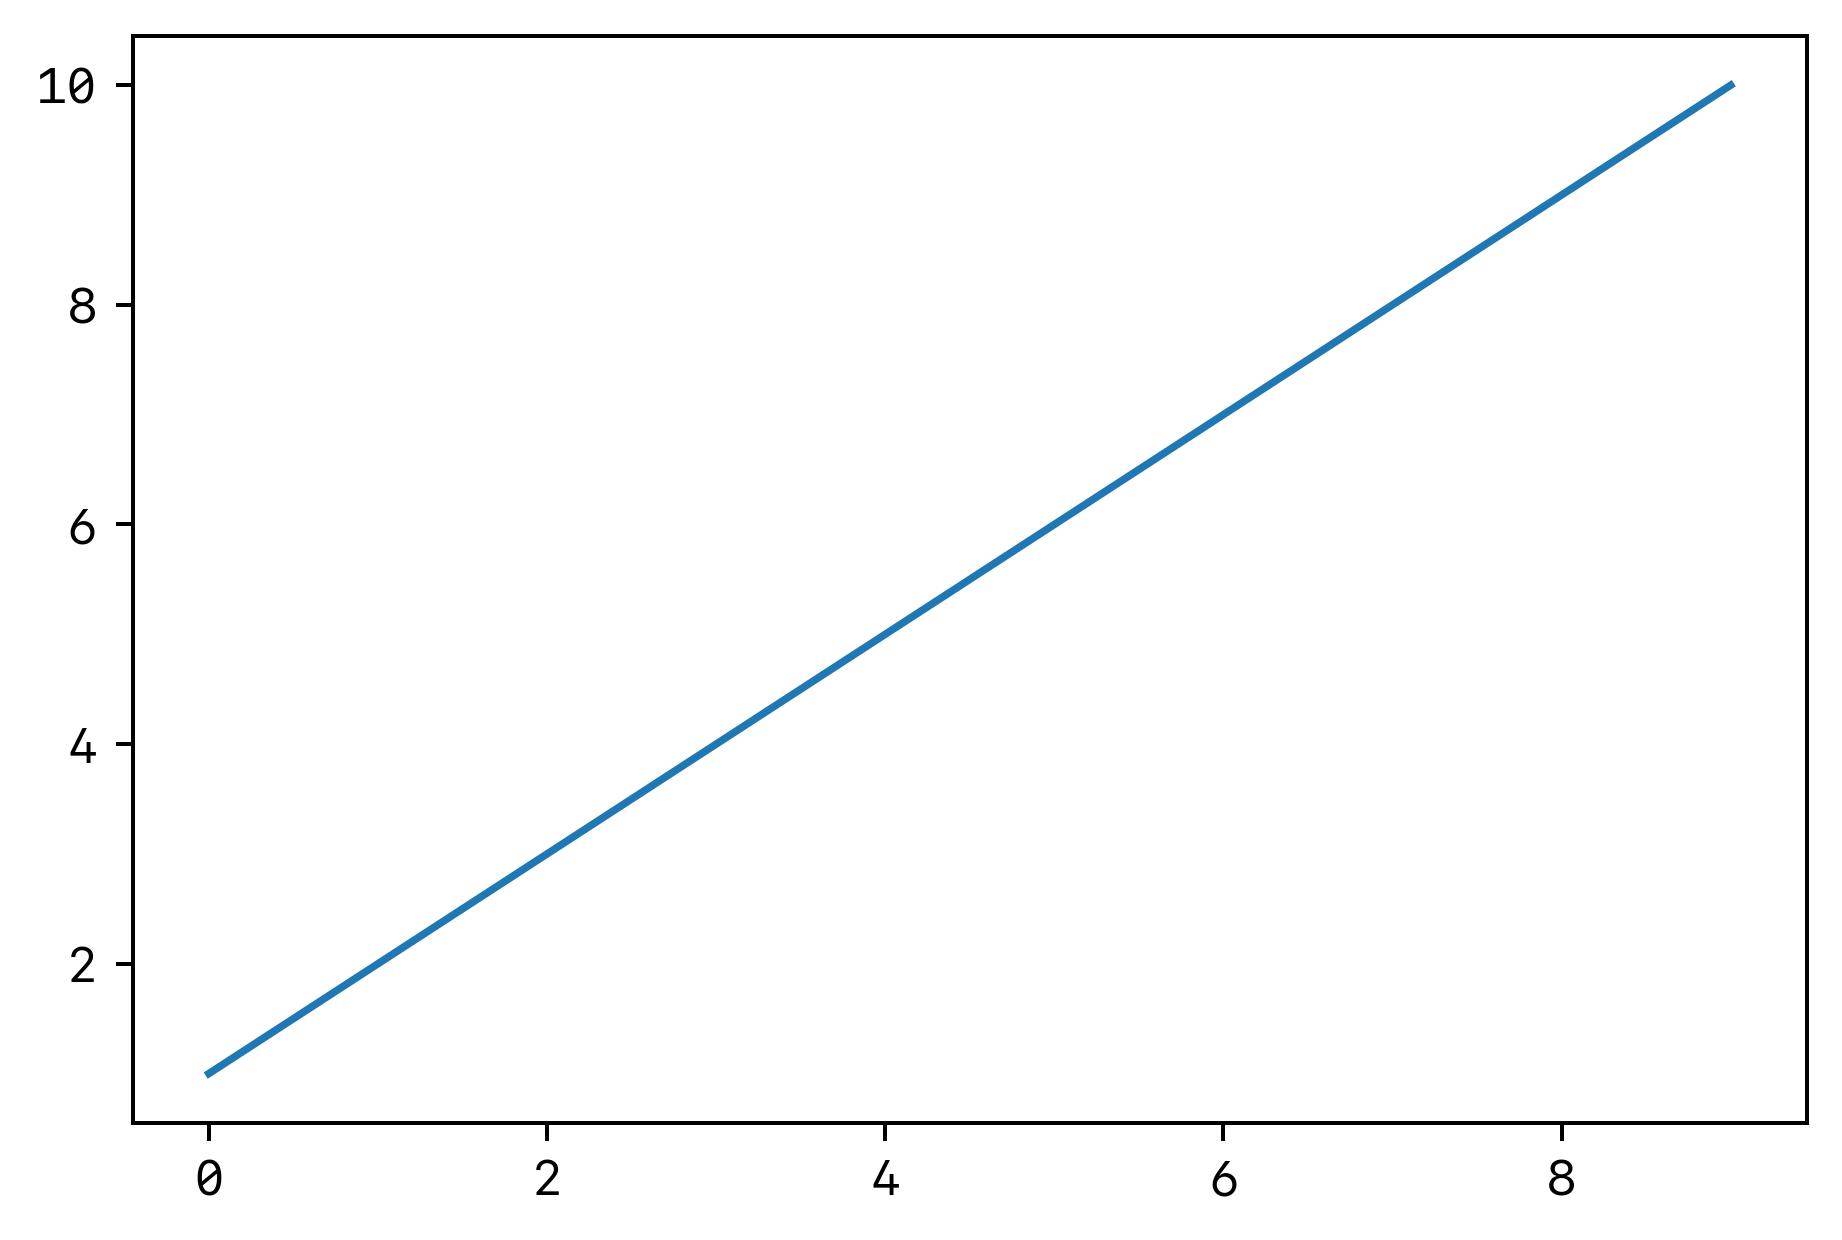

In [16]:
test = pd.Series([1,2,3,4,5,6,7,8,9,10])
test.plot()

上面这组数据一眼望去就是个等差数列，数列的d=1，n=10，即一共有10个数，差是1。刚才是用数学语言描述了这组数据。从数据分析的角度看，也不用那么专业，这就是一组线性相关的数据y=ax+b，并且这里a>0，数据是递增变化的。

**一阶差分**:

9


<AxesSubplot:>

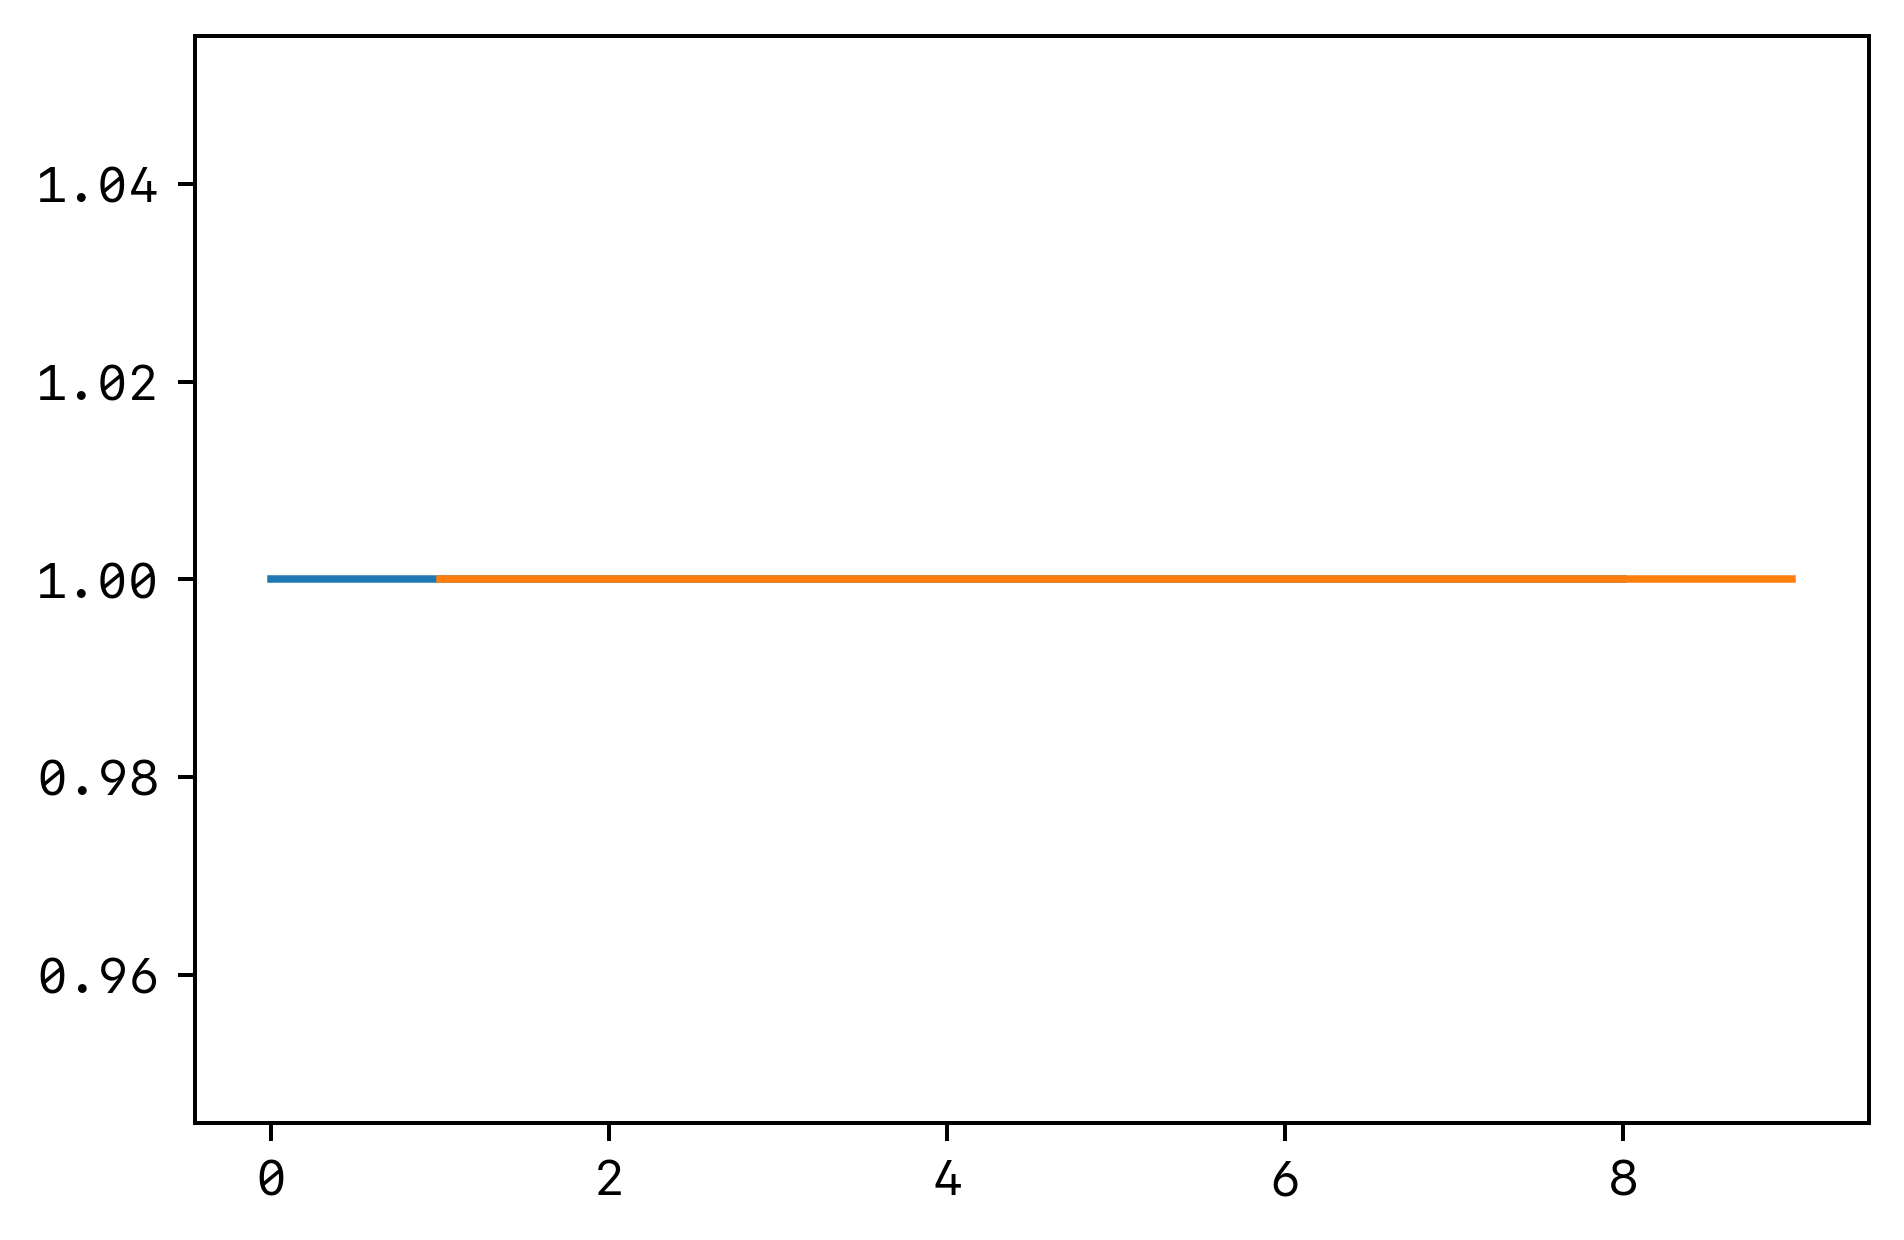

In [17]:
test_diff1 = diff(a=test,n=1)
print(len(test_diff1))
plt.plot(test_diff1)

#或者可以调用Series对象的内置方法
test_diff1 = test.diff(1)
test_diff1.plot()

**二阶差分**:

8


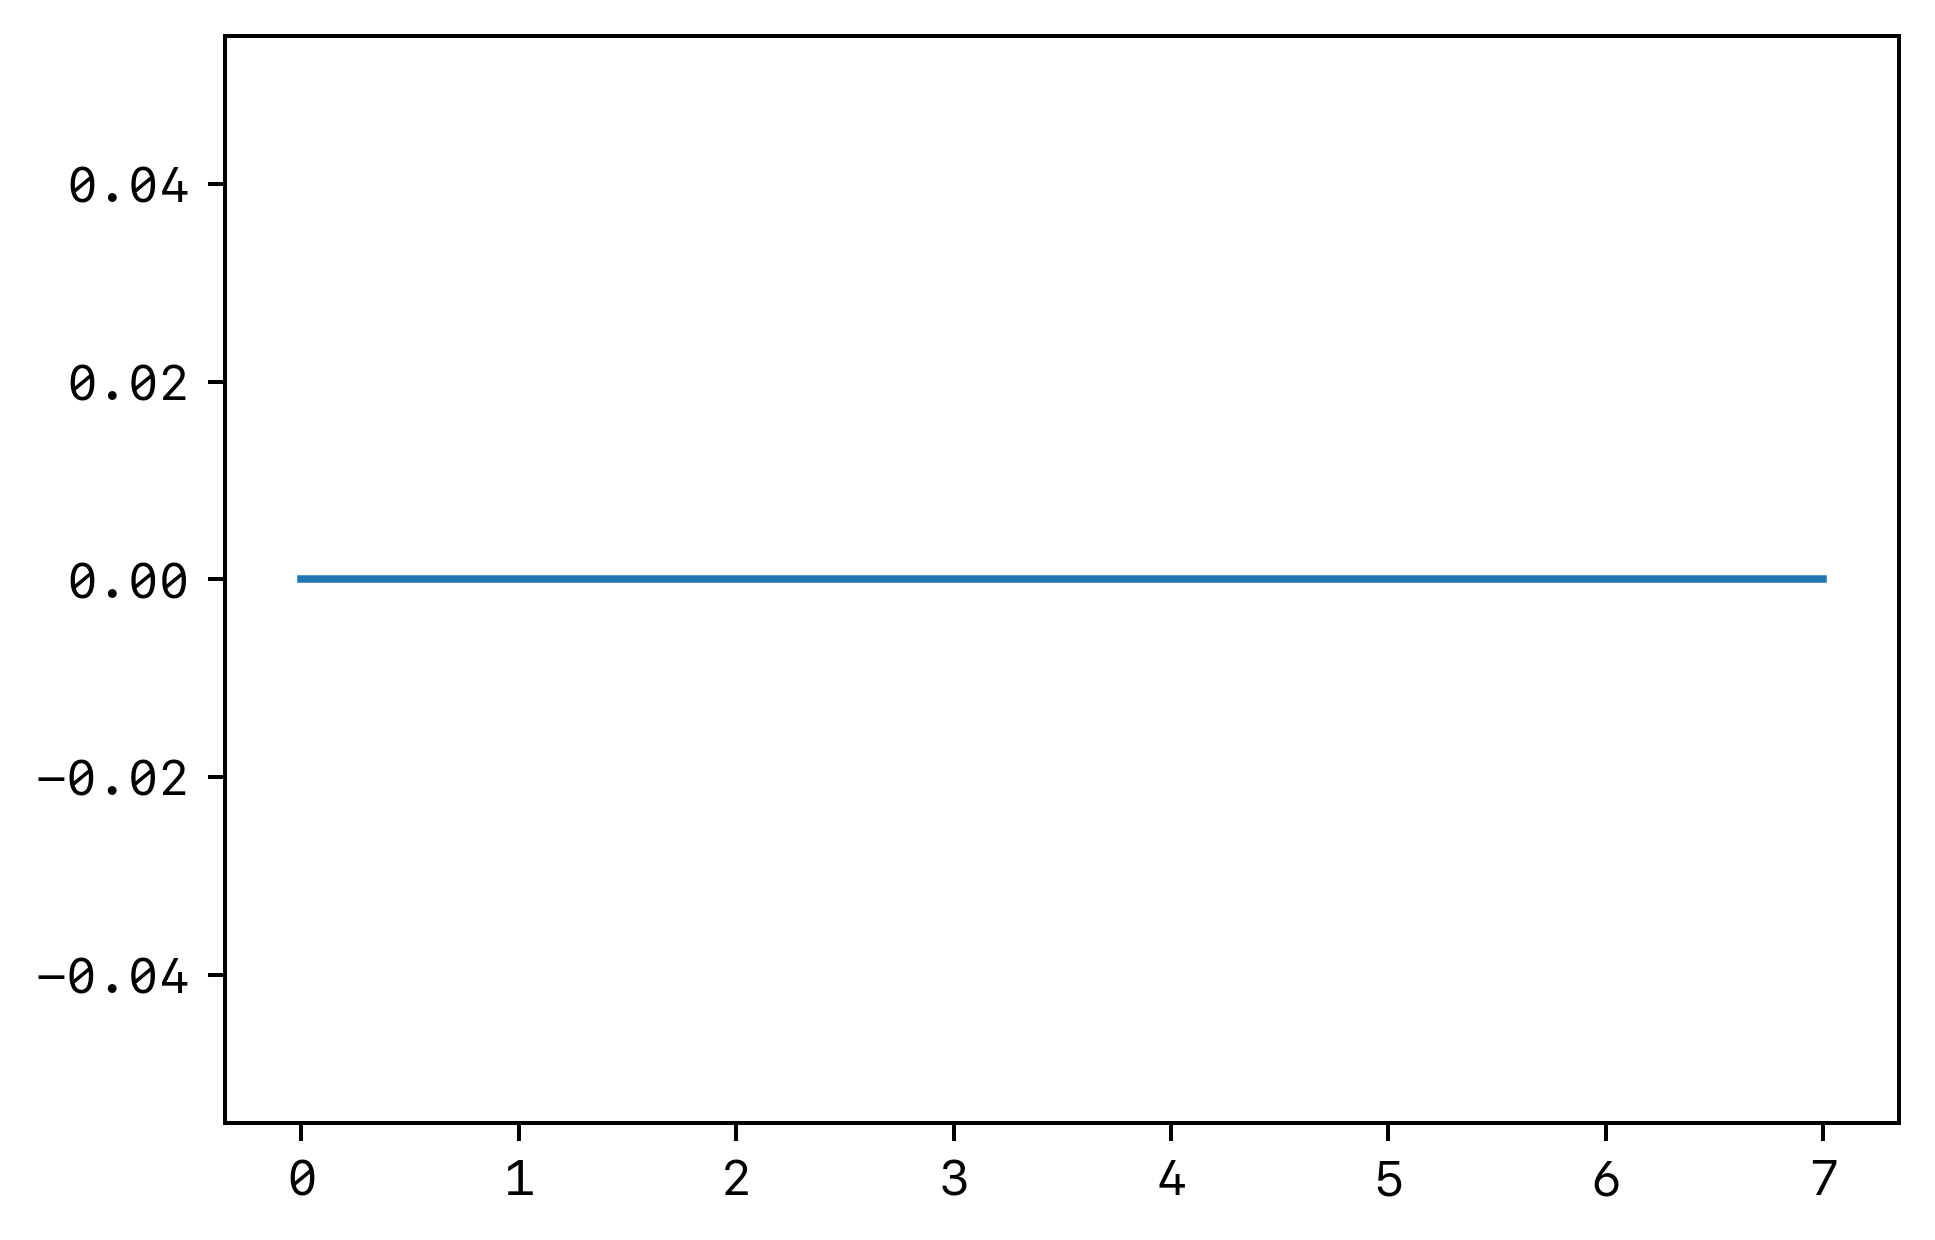

In [18]:
test_diff2 = diff(a=test,n=2)
print(len(test_diff2))
plt.plot(test_diff2)

二阶差分的值均为0，这以为这什么？二阶差分是一阶差分再求一次差分得到的，这表明一阶差分值不再发生变化，用一个线性函数即可以描述原始数据，并且残差是0。当然这只是一个特例，一般情况下做了二阶差分并不会直接为0，而是有可能近似趋近0。

## 马尔科夫链-选举投票预测

马尔科夫链是由具有以下性质的一系列事件构成的过程：

- 一个事件有有限多个结果，称为状态，该过程总是这些状态中的一个；
- 在过程的每个阶段或者时段，一个特定的结果可以从它现在的状态转移到任 何状态，或者保持原状；
- 每个阶段从一个状态转移到其他状态的概率用一个转移矩阵表示，矩阵每行 的各元素在0到1之间，每行的和为1。

选举投票趋势预测，以美国大选为例，首先取得过去十次选举的历史数据，然后根据历史数据得到 选民意向的转移矩阵。

<img src="../images/iShot2021-08-31 18.28.50.png"/>
<img src="../images/iShot2021-08-31 18.29.05.png"/>
<img src="../images/iShot2021-08-31 18.30.10.png"/>

[0.33333, 0.4499955, 0.500828325, 0.52611973875, 0.5394966883125, 0.5467473449718749, 0.5507138730145312, 0.5528911968139921, 0.5540878715788957, 0.5547458720346327, 0.5551077381522961, 0.5553067576904125, 0.5554162170710568, 0.5554764194573473, 0.5555095307151943, 0.5555277418960876, 0.5555377580433943, 0.5555432669239762, 0.5555462968082088, 0.5555479632445193, 0.5555488797844865, 0.5555493838814678, 0.5555496611348074, 0.5555498136241441, 0.5555498974932793, 0.5555499436213037, 0.5555499689917172, 0.5555499829454446, 0.5555499906199945, 0.5555499948409971, 0.5555499971625485, 0.5555499984394018, 0.555549999141671, 0.5555499995279192, 0.5555499997403557, 0.5555499998571958, 0.5555499999214578, 0.555549999956802, 0.5555499999762412, 0.5555499999869329, 0.5555499999928133]
[0.33333, 0.28333050000000004, 0.24583087500000003, 0.22320610125000004, 0.21036247968750002, 0.20321848862812503, 0.19927329370546876, 0.1971002365300078, 0.1959044150899043, 0.19524658529912736, 0.19488475331445604

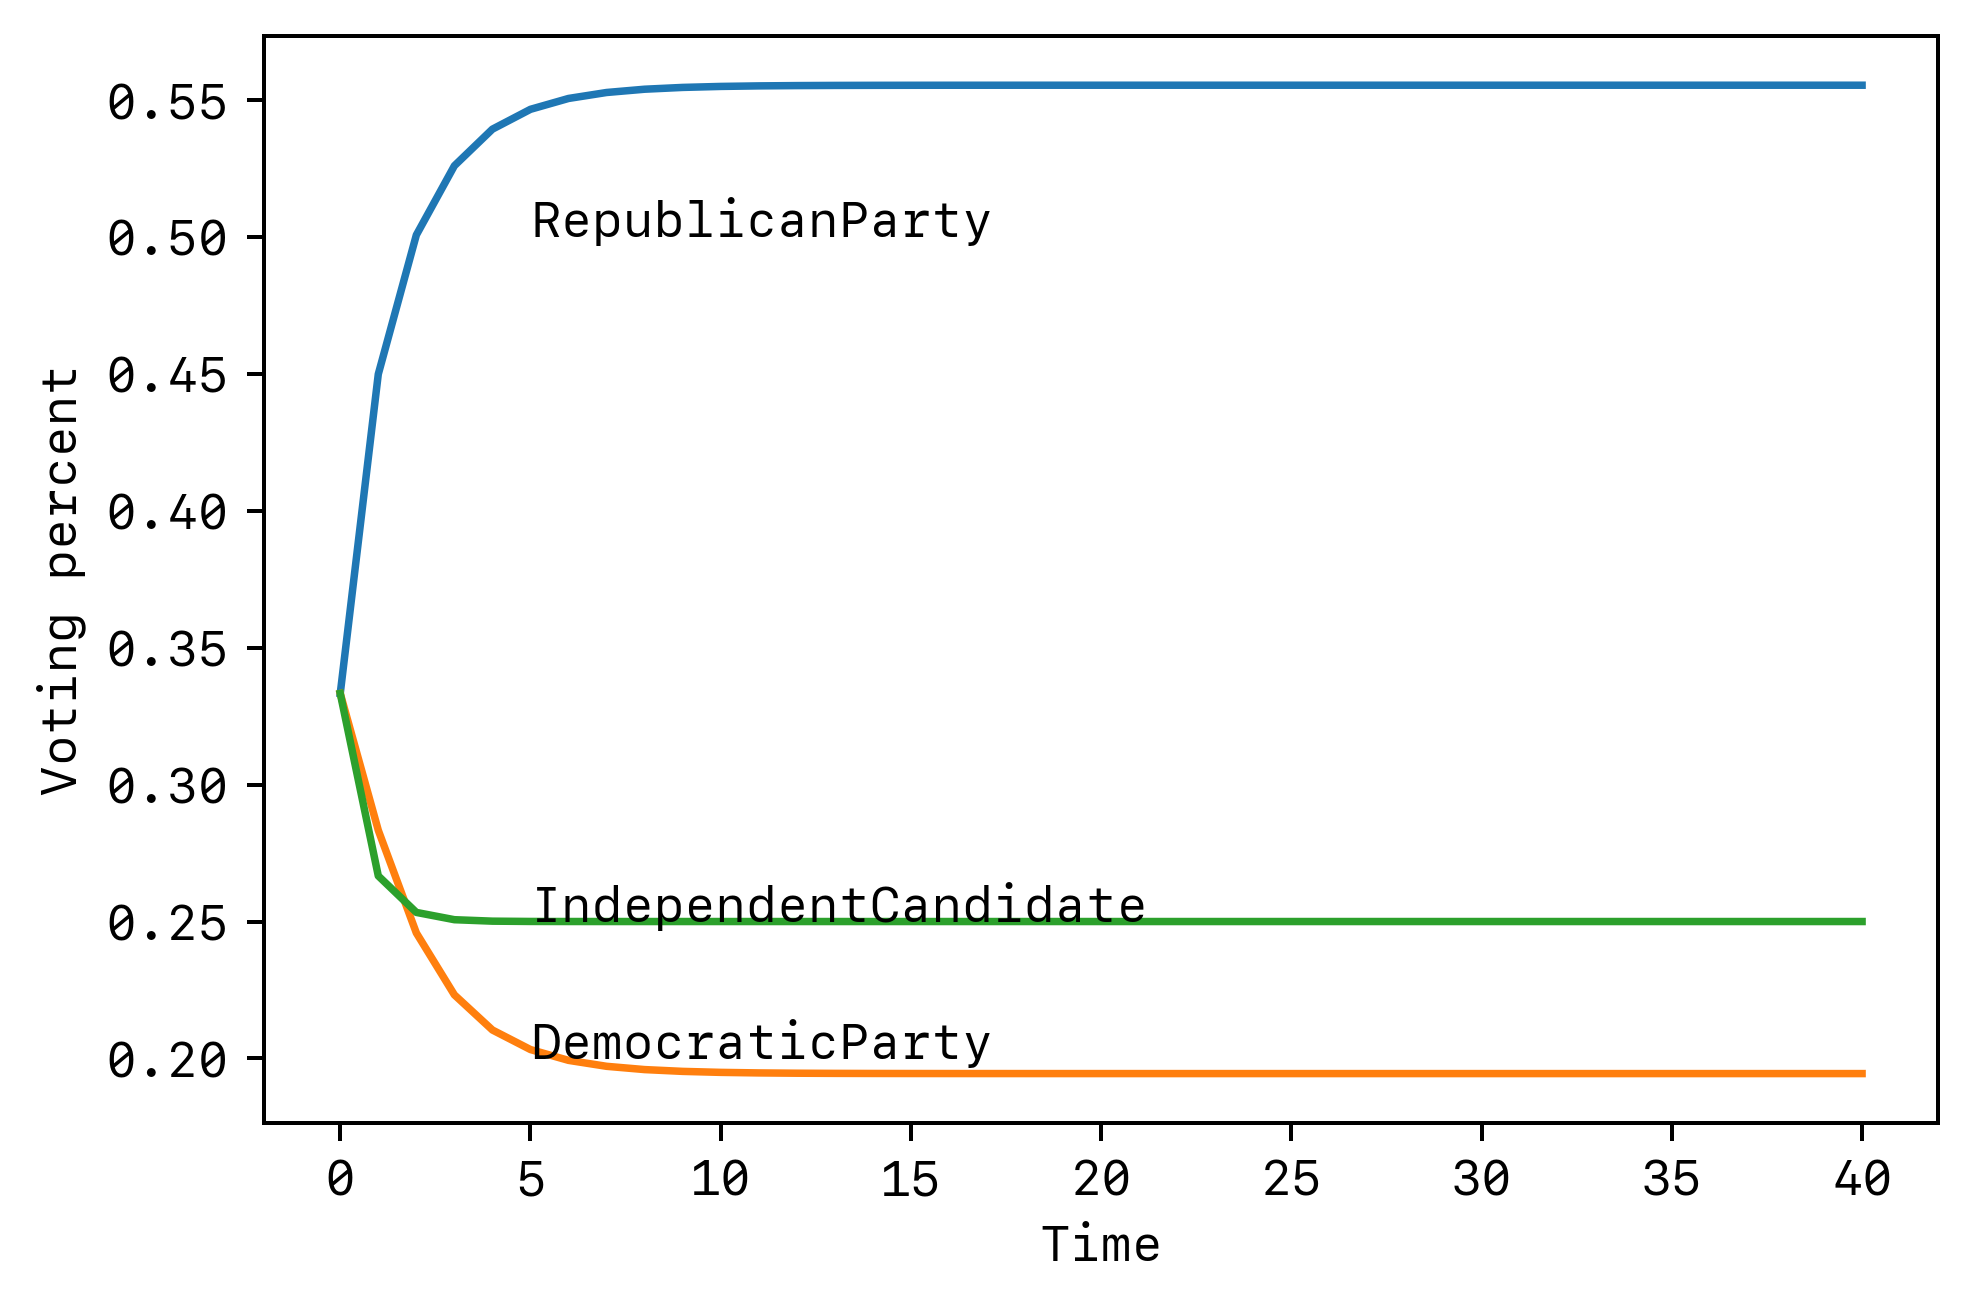

[0.33333, 0.4499955, 0.500828325, 0.52611973875, 0.5394966883125, 0.5467473449718749, 0.5507138730145312, 0.5528911968139921, 0.5540878715788957, 0.5547458720346327, 0.5551077381522961, 0.5553067576904125, 0.5554162170710568, 0.5554764194573473, 0.5555095307151943, 0.5555277418960876, 0.5555377580433943, 0.5555432669239762, 0.5555462968082088, 0.5555479632445193, 0.5555488797844865, 0.5555493838814678, 0.5555496611348074, 0.5555498136241441, 0.5555498974932793, 0.5555499436213037, 0.5555499689917172, 0.5555499829454446, 0.5555499906199945, 0.5555499948409971, 0.5555499971625485, 0.5555499984394018, 0.555549999141671, 0.5555499995279192, 0.5555499997403557, 0.5555499998571958, 0.5555499999214578, 0.555549999956802, 0.5555499999762412, 0.5555499999869329, 0.5555499999928133] [0.33333, 0.28333050000000004, 0.24583087500000003, 0.22320610125000004, 0.21036247968750002, 0.20321848862812503, 0.19927329370546876, 0.1971002365300078, 0.1959044150899043, 0.19524658529912736, 0.19488475331445604

In [19]:
# 初始化
RLIST = [0.33333]
DLIST = [0.33333]
ILIST = [0.33333]

for i in range(40):
    R = RLIST[i]*0.75+DLIST[i]*0.20+ILIST[i]*0.40
    RLIST.append(R)
    D = RLIST[i]*0.05+DLIST[i]*0.60+ILIST[i]*0.20
    DLIST.append(D)
    I = RLIST[i]*0.20+DLIST[i]*0.20+ILIST[i]*0.40
    ILIST.append(I)
print(RLIST)
print(DLIST)
print(ILIST)
plt.plot(RLIST)
plt.plot(DLIST)
plt.plot(ILIST)
plt.xlabel('Time')
plt.ylabel('Voting percent')
plt.annotate('DemocraticParty',xy = (5,0.2))
plt.annotate('RepublicanParty',xy = (5,0.5))
plt.annotate('IndependentCandidate',xy = (5,0.25))
plt.show()
print(RLIST,DLIST,ILIST)